# Importando as bibliotecas e os dados

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [162]:
df = pd.read_csv('/kaggle/input/titanic/train.csv', sep=',', header=0)

# Visualizando os dados

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [164]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [165]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [166]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Visão Geral Inicial dos Dados

- O conjunto de dados contém **891 passageiros**.
- A análise com `df.describe()` e `df.info()` indica que **não há valores duplicados**, já que o número de valores únicos é igual ao número total de entradas.
- Além disso, o campo com maior frequência (`freq`) é igual a 1, o que sugere que **não há valores dominantes repetidos** em colunas categóricas como `Name` ou `Ticket`.
- `df.isnull().sum()` indica que não há valores nulos a serem tratados.


# Renomeando as colunas
Renomeando as colunas para letra minúscula para maior agilidade na escrita

In [167]:
# renomeando a coluna
passenger = {"PassengerId": "passenger_id"}
df.rename(passenger, axis=1, inplace=True)

# transformando o título das colunas em lowercase
df.columns = df.columns.str.lower()

# Análise exploratória de dados

In [168]:
print(df.columns)


Index(['passenger_id', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')


In [169]:
surv_rate = df['survived'].mean()
print(f'Taxa de sobrevivência: {surv_rate:.2%}')

Taxa de sobrevivência: 38.38%


In [170]:
survivors_gender = df.groupby('sex')['survived'].sum()

for gender in survivors_gender.index:   
    print(f"Sobreviventes do gênero {gender}: {survivors_gender[gender]}")

Sobreviventes do gênero female: 233
Sobreviventes do gênero male: 109


In [171]:
survivors_class = df.groupby('pclass')['survived'].sum()

print('Sobreviventes por classe:')
for pclass in survivors_class.index:   
    print(f"Classe {pclass}: {survivors_class[pclass]} sobreviventes")

Sobreviventes por classe:
Classe 1: 136 sobreviventes
Classe 2: 87 sobreviventes
Classe 3: 119 sobreviventes


In [172]:
def age_range(age):
    if age < 12:
        return 'child'
    elif age < 18:
        return 'teenager'
    elif age < 25:
        return 'young adult'
    elif age < 60:
        return 'adult'
    else:
        return 'elderly'

df['age_range'] = df['age'].apply(age_range)  

survivors_age_rate = df.groupby('age_range')['survived'].mean()

print('Sobreviventes por faixa etária:')
for faixa, taxa in survivors_age_rate.items():
    print(f"{faixa}: {taxa:.2%}")


Sobreviventes por faixa etária:
adult: 40.24%
child: 57.35%
elderly: 29.06%
teenager: 48.89%
young adult: 34.55%


## Faixas com os maiores sobreviventes

In [173]:
## Gênero

In [174]:
gender = survivors_gender.idxmax()
print(f'Gênero {gender} com {survivors_gender.max()} sobreviventes')

print(f'Percentual: {survivors_gender.max() / len(df):.2%}')

Gênero female com 233 sobreviventes
Percentual: 26.15%


## Classe

In [175]:
pclass = survivors_class.idxmax()
print(f'Classe {pclass} com {survivors_class.max()} sobreviventes')
print(f'Percentual: {survivors_class.max() / len(df):.2%}')

Classe 1 com 136 sobreviventes
Percentual: 15.26%


## Faixa etária

In [176]:
age = survivors_age_rate.idxmax()
survivors_age_count = df.groupby('age_range')['survived'].sum()

print(f'{age} com {survivors_age_count[age]} sobreviventes')
print(f'Percentual: {survivors_age_rate.max():.2%}')

child com 39 sobreviventes
Percentual: 57.35%


In [177]:
group = df.groupby(['sex', 'age_range', 'pclass'])['survived']

mean_survival = group.mean()

max_combo = mean_survival.idxmax()
max_rate = mean_survival.max()

group_sizes = group.size()
tamanho_grupo = group_sizes[max_combo]

print(f"Maior taxa de sobrevivência: {max_rate:.2%}")
print(f"Gênero: {max_combo[0]}, Faixa Etária: {max_combo[1]}, Classe: {max_combo[2]}")
print(f"Tamanho do grupo: {tamanho_grupo} pessoas")
print(f'Tamanho do grupo em relação ao navio {(tamanho_grupo/len(df)):.2%}')

Maior taxa de sobrevivência: 100.00%
Gênero: female, Faixa Etária: child, Classe: 2
Tamanho do grupo: 8 pessoas
Tamanho do grupo em relação ao navio 0.90%


# Relação de gênero, classe e idade por sobrevivência
- O gênero feminino foi o gênero com uma maior taxa de sobreviência de `26.15%`
- A classe com os maiores sobreviventes foi a classe 1 com `15.26%` dos sobrevientes
- A faixa etária com os maiores sobrevientes foram as crianças com `57.35%` dos sobreviventes
- 
# Grupo com maior sobrevivência
Com isso, verificamos que todas as crianças do gênero feminino que estavam na classe 2 sobreviveram. Isso é **menos que 1% dos passageiros**

# Fatores históricos
Segundo cientistas, é mito considerar que, em naufrágios, mulheres e crianças deveriam ser salvas primeiro como regra absoluta. No entanto, ao analisarmos o contexto histórico e os dados do Titanic, observamos que muitos homens realmente se sacrificaram para garantir a evacuação das demais pessoas.

# Gráficos

## Taxa de sobreviência por gênero

(0.0, 1.0)

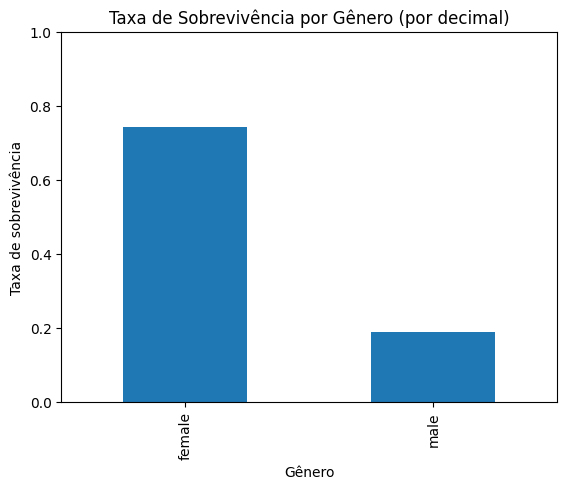

In [178]:
df.groupby('sex')['survived'].mean().plot(kind='bar', title='Taxa de Sobrevivência por Gênero (por decimal)')

plt.ylabel('Taxa de sobrevivência')
plt.xlabel('Gênero')
plt.ylim(0, 1)


# Proporção de sobreviventes por classe

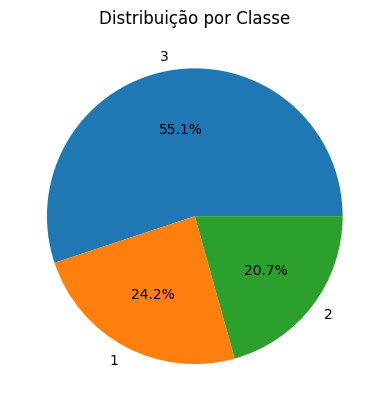

In [179]:
df['pclass'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribuição por Classe')
plt.ylabel('')
plt.show()


# Sobrevivência por faixa etária

(0.0, 1.0)

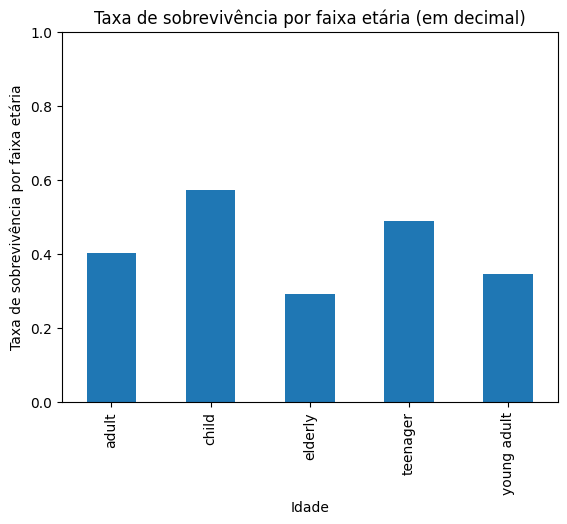

In [180]:
df.groupby('age_range')['survived'].mean().plot(kind='bar', title='Taxa de sobrevivência por faixa etária (em decimal)')

plt.ylabel('Taxa de sobrevivência por faixa etária')
plt.xlabel('Idade')
plt.ylim(0, 1)

# Conclusão final
Neste projeto, exploramos o conjunto de dados do Titanic para entender os fatores que influenciaram a sobrevivência dos passageiros. Observamos que:

- **Mulheres** apresentaram uma taxa de sobrevivência significativamente maior que homens.
  
- **Crianças** tiveram maior chance de sobreviver, reforçando a prioridade histórica dada a esse grupo.

  
- Passageiros da **primeira classe** tiveram taxas de sobrevivência superiores às das classes inferiores, refletindo condições sociais da época.

- A análise combinada por gênero, faixa etária e classe revelou que o **grupo com maior taxa de sobrevivência foi o de crianças do gênero feminino na segunda classe**, embora representasse uma pequena fração dos passageiros.

Esses resultados corroboram relatos históricos sobre a evacuação do navio e ressaltam como dados podem nos ajudar a compreender eventos complexos. Além disso, esse projeto exemplifica o processo de análise exploratória de dados (EDA), desde a limpeza, transformação, análise até a visualização e interpretação.